In [2]:
from ipfml import processing
from ipfml import utils
from ipfml import metrics
from PIL import Image
from scipy import signal
from skimage import color
import scipy.stats as stats
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
data_folder = "../fichiersSVD_light"

# SVD analysis on zones of Synthesis Images 

## Utils functions definition

In [3]:
def compute_images_path(dict_data):
    scene = dict_data['name']
    prefix = dict_data['prefix']
    indices = dict_data['indices']
    
    images_path = []
    for index in indices:
        path = os.path.join(data_folder, os.path.join(scene, prefix + index + ".png"))
        print(path)
        images_path.append(path)
    return images_path

In [4]:
def get_images_zones(dict_data, images_path):
    
    zones_indices = dict_data['zones']
    zones_img = []
    
    for path in images_path:
        img = Image.open(path)
        zones = processing.divide_in_blocks(img, (200, 200))
        
        zones_list = []
        
        for id_zone in zones_indices:
            zones_list.append(zones[id_zone])
            
        zones_img.append(zones_list)
        
    return zones_img

In [5]:
def display_sv_data(dict_data, zones_data, interval, _norm=False):
    
    scene_name = dict_data['name']
    image_indices = dict_data['indices']
    zones_indices = dict_data['zones']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    
    plt.figure(figsize=(25, 20))
    
    sv_data = []
    begin, end = interval
    for id_img, zones in enumerate(zones_data):
        
        for id_zone, zone in enumerate(zones):
            U, s, V = processing.get_LAB_L_SVD(zone)
        
            data = s[begin:end]
            
            if _norm:
                data = utils.normalize_arr(data)
                
            plt.plot(data, 
                     color=colors[id_zone], 
                     label='Zone ' + str(zones_indices[id_zone]) + ' of ' + scene_name + '_' + str(image_indices[id_img]))
            
    plt.legend(fontsize=18)
    plt.show()

## Scenes zones data

In [6]:
# start 00020 - ref 00900 - step 10
dict_appart = {'name': 'Appart1opt02', 
               'prefix': 'appartAopt_', 
               'indices': ["00020", "00200", "00900"],
               'zones': [3, 6]}

# start 00050 - ref 01200 - step 10
dict_cuisine = {'name': 'Cuisine01', 
               'prefix': 'cuisine01_', 
               'indices': ["00050", "00400", "01200"],
               'zones': [3, 6]}

# start 00020 - ref 00950 - step 10
dict_sdb_c = {'name': 'SdbCentre', 
               'prefix': 'SdB2_', 
               'indices': ["00020", "00400", "00950"],
               'zones': [3, 6]}

# start 00020 - ref 00950 - step 10
dict_sdb_d = {'name': 'SdbDroite', 
               'prefix': 'SdB2_D_', 
               'indices': ["00020", "00400", "00950"],
               'zones': [2, 3, 10, 13]}

In [10]:
current_dict = dict_sdb_d
interval = (30, 200)

### Simulations obtained from best model of SdbDroite scene

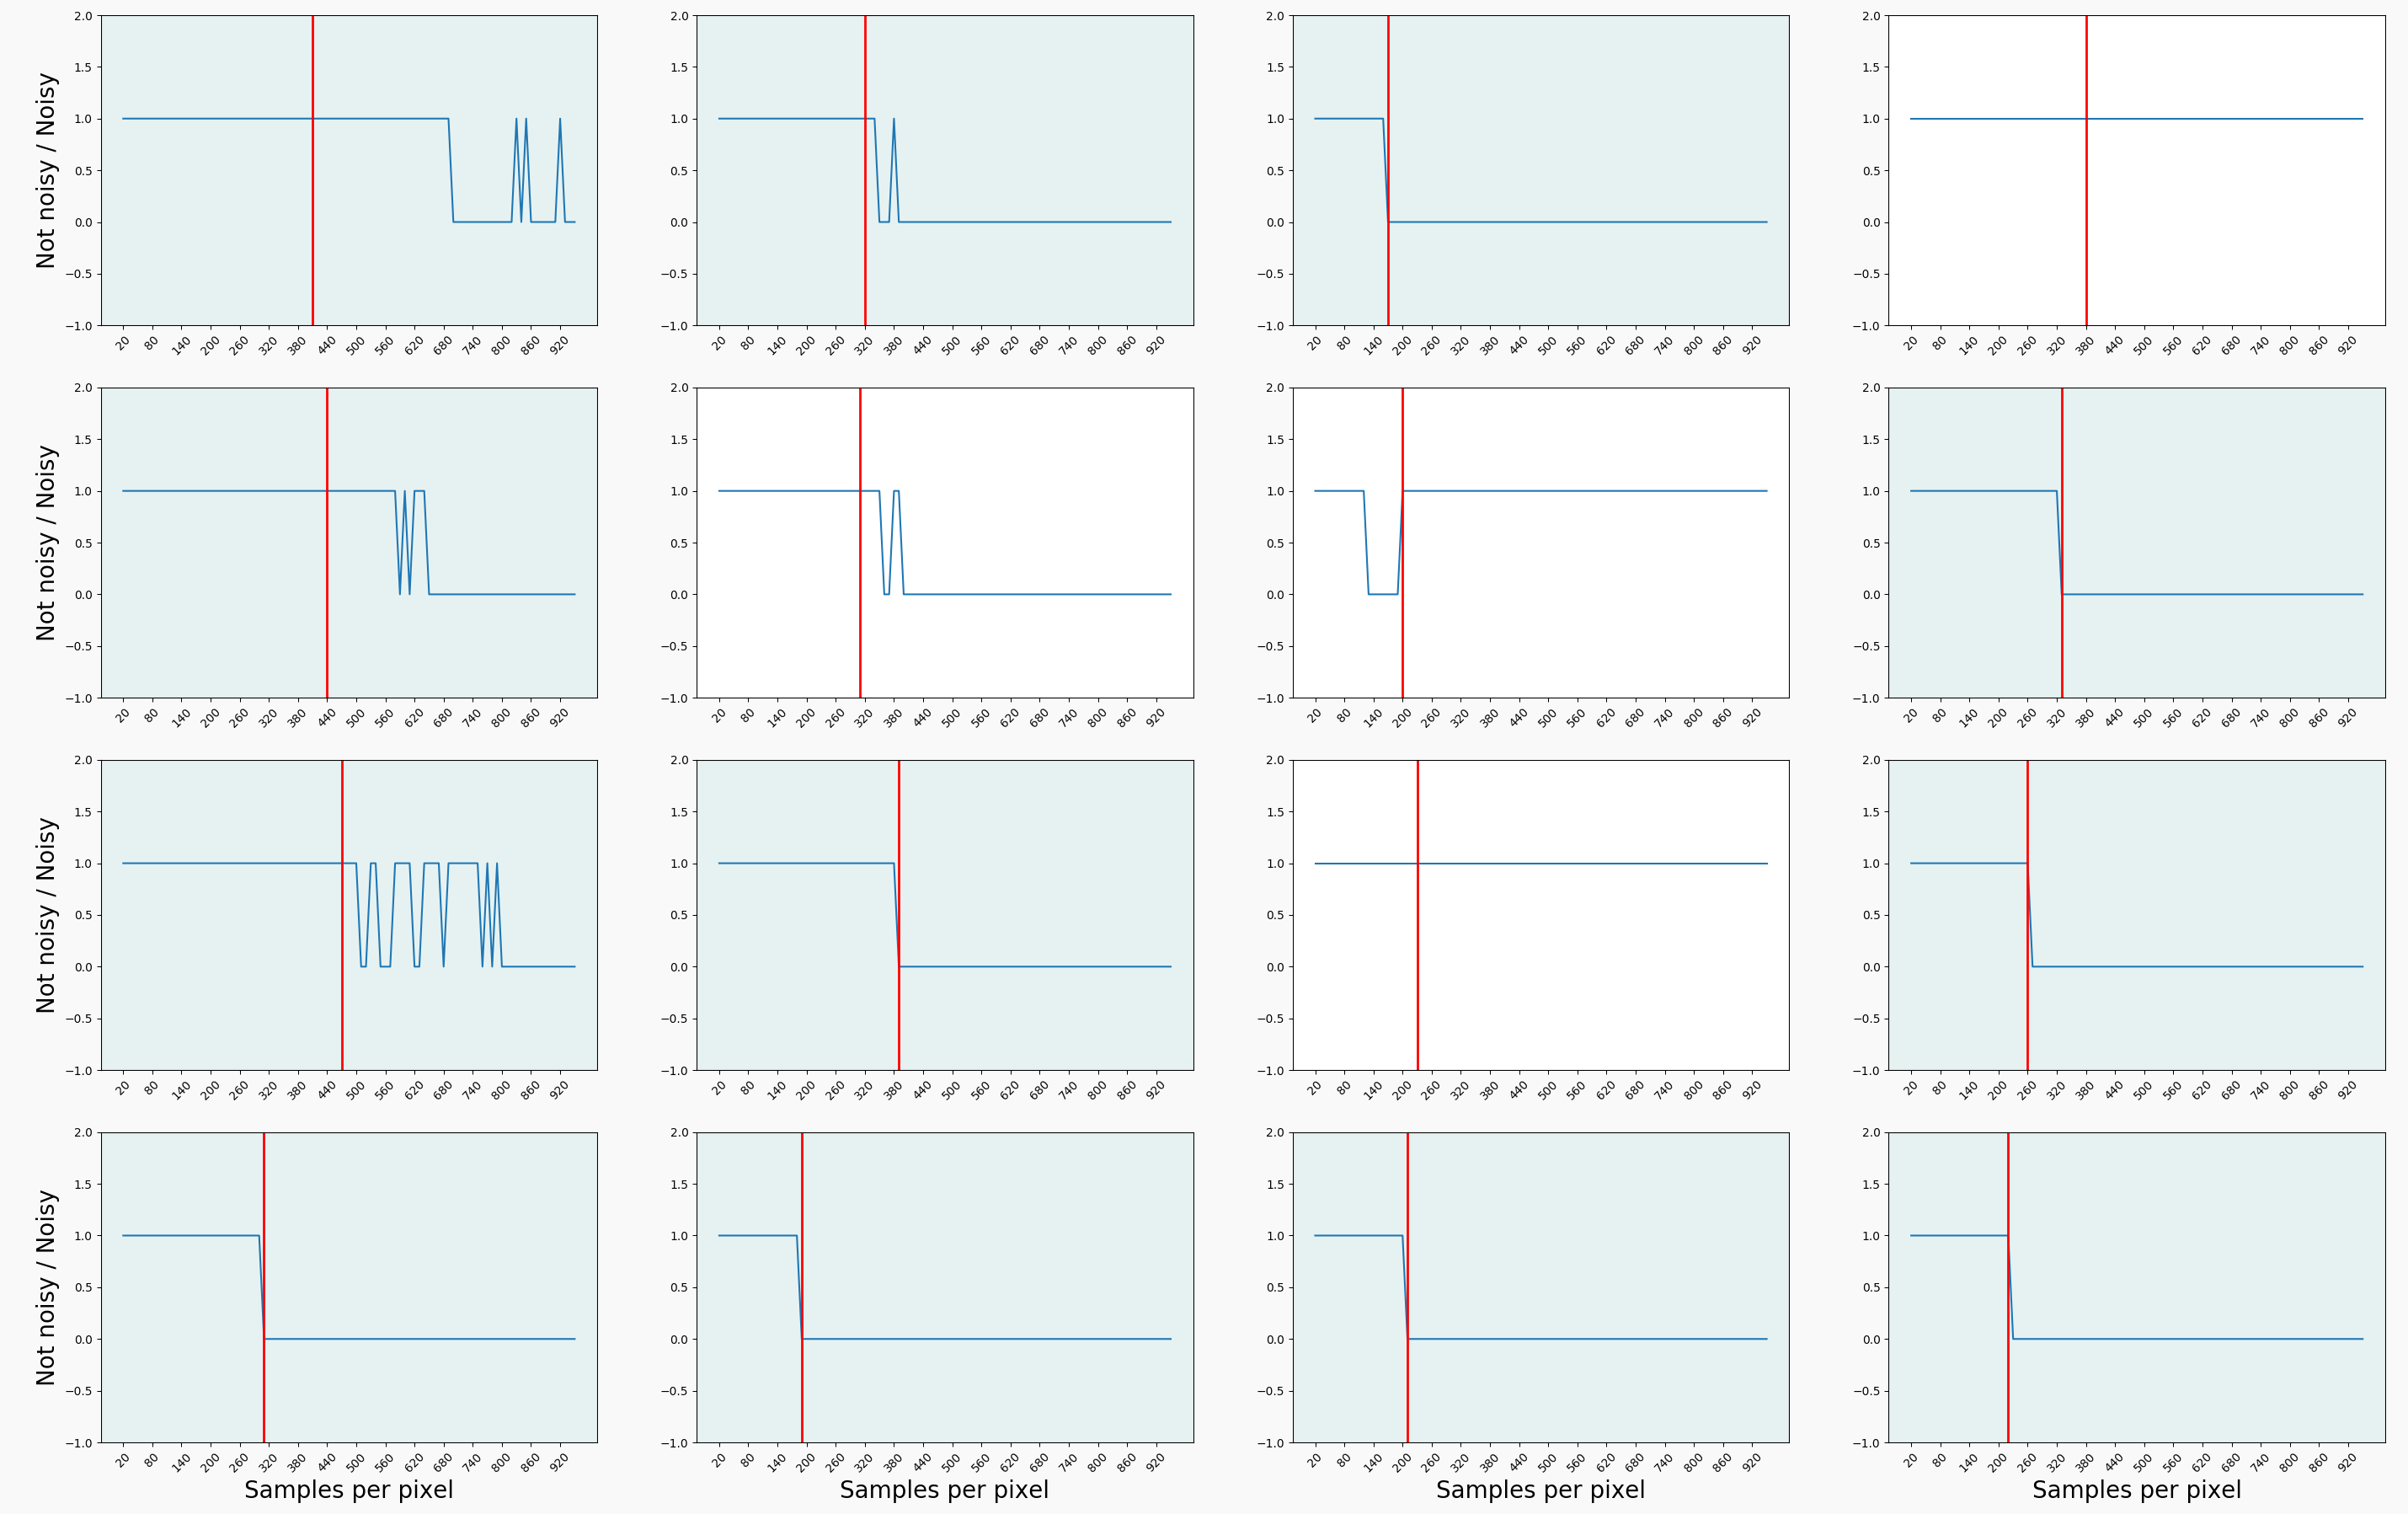

In [14]:
simu_image = "/home/jbuisine/Downloads/SdbDroite_simulation_curve.png"
Image.open(simu_image)

### Zones 2, 13 well predicted vs zones 3, 10 not well predicted

Ici on va s'intéresser à visualiser à différents niveaux de bruits (nombre de samples) les valeurs des SV entre zones. L'objectif est de comprendre pourquoi le modèle apprend et n'apprend pas correctement une zone.

#### Without normalization of data

../fichiersSVD_light/SdbDroite/SdB2_D_00020.png
../fichiersSVD_light/SdbDroite/SdB2_D_00400.png
../fichiersSVD_light/SdbDroite/SdB2_D_00950.png


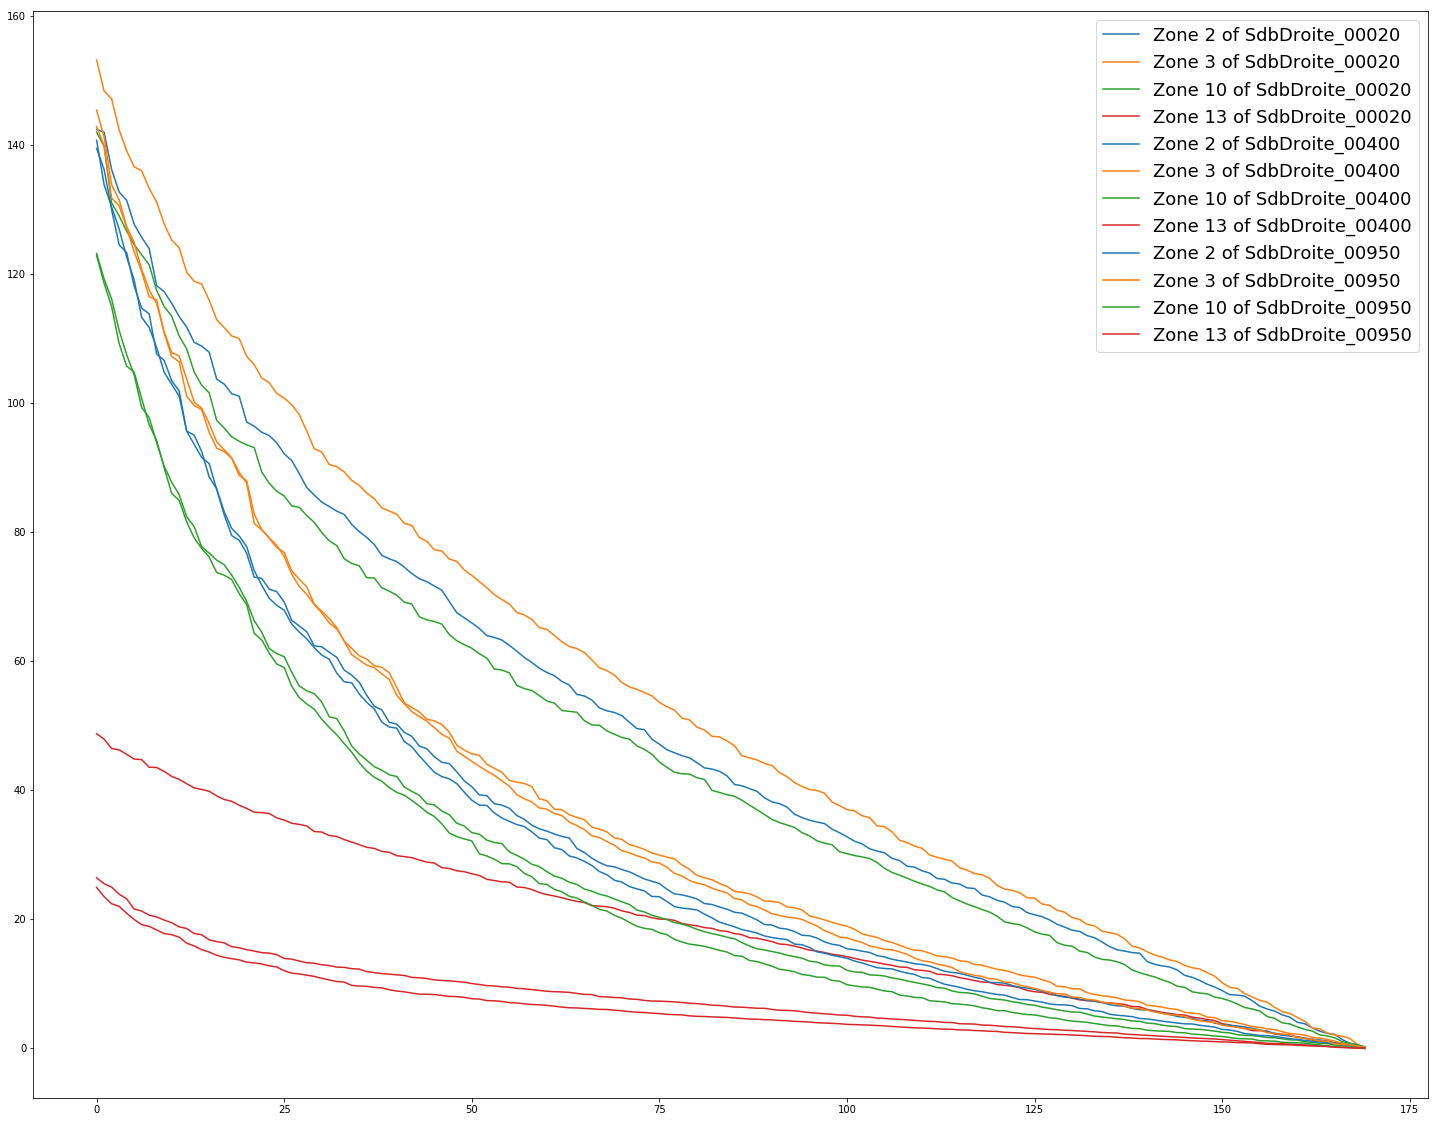

In [8]:
images_path = compute_images_path(current_dict)
zones_data = get_images_zones(current_dict, images_path)
display_sv_data(current_dict, zones_data, interval)

La tendance des courbes, ne semblent pas avoir d'influence sur la prédiction finale étant donné la quantité d'informations présentes dans la zone 13.

#### With data normalization

../fichiersSVD_light/SdbDroite/SdB2_D_00020.png
../fichiersSVD_light/SdbDroite/SdB2_D_00400.png
../fichiersSVD_light/SdbDroite/SdB2_D_00950.png


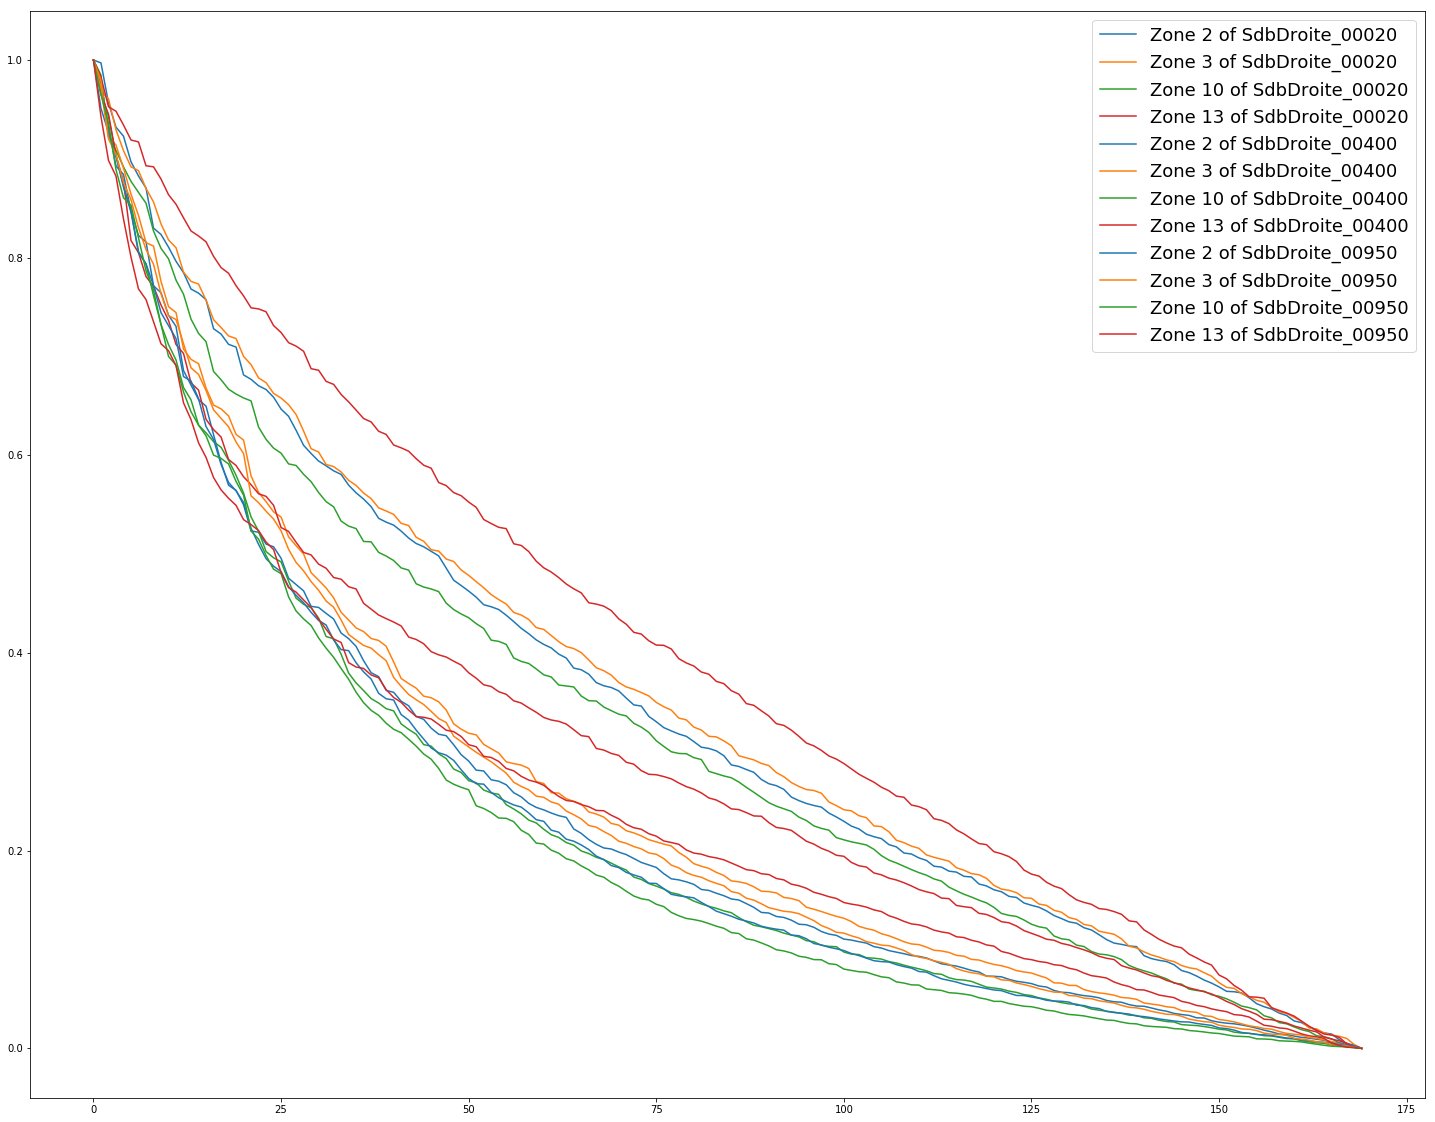

In [9]:
images_path = compute_images_path(current_dict)
zones_data = get_images_zones(current_dict, images_path)
display_sv_data(current_dict, zones_data, interval, True)

Le fait de normaliser permet de ramener les différentes valeurs des SV sur la même grandeur, toutefois **une différenciation avec une zone détectée correctement et non détectée lors de simulation par un modèle, ne semble pas être visible.**